In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d msambare/fer2013

 88% 53.0M/60.3M [00:00<00:00, 136MB/s]
100% 60.3M/60.3M [00:00<00:00, 140MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/fer2013.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,BatchNormalization,Dropout,GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
import numpy as n
import pandas as p
import os
import matplotlib.pyplot as py
import random
%matplotlib inline
import random
from keras.applications import MobileNetV2
from keras.models import Model
from keras import regularizers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img,img_to_array
from keras.utils import to_categorical
import cv2

In [27]:
train_datagen = ImageDataGenerator(
           rescale = 1./255,
           rotation_range = 40,
           width_shift_range = 0.2,
           height_shift_range=0.2,
           shear_range = 0.2,
           zoom_range = 0.4,
           horizontal_flip = True,
           fill_mode = 'nearest'

    )

test_datagen = ImageDataGenerator(
           rescale = 1./224,
)


train_generator = train_datagen.flow_from_directory(
       '/content/train',
       target_size = (224,224),
       batch_size = 32,
       class_mode='categorical'
)

val_generator = test_datagen.flow_from_directory(
       '/content/test',
       target_size = (224,224),
       batch_size = 32,
       class_mode='categorical'
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [7]:
model = MobileNetV2()

14536120/14536120 [==============================] - 0s 0us/step


In [8]:
base_input = model.layers[0].input

In [9]:
base_output = model.layers[-2].output

In [10]:
final_output = keras.layers.Dense(128)(base_output)
final_output = keras.layers.Activation('relu')(final_output)
final_output = keras.layers.Dense(64)(final_output)
final_output = keras.layers.Activation('relu')(final_output)
final_output = keras.layers.Dense(7,activation = 'softmax')(final_output)

In [11]:
new_model = keras.Model(inputs=base_input,outputs = final_output)

In [12]:
new_model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(0.0003),metrics=['accuracy'])

In [13]:
checkpointer = [tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', verbose = 1, restore_best_weights=True, mode="max",patience = 10),
                tf.keras.callbacks.ModelCheckpoint(
                    filepath='final_model_weights.hdf5',
                    monitor="val_accuracy",
                    verbose=1,
                    save_best_only=True,
                    mode="max")]

In [14]:
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = val_generator.n // val_generator.batch_size
history = new_model.fit(x=train_generator,
                 validation_data=val_generator,
                 epochs=25,
                 callbacks=[checkpointer],
                 steps_per_epoch=steps_per_epoch,
                 validation_steps=validation_steps)

Epoch 1/25
897/897 [==============================] - ETA: 0s - loss: 1.4038 - accuracy: 0.4589
Epoch 1: val_accuracy improved from -inf to 0.42397, saving model to final_model_weights.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


897/897 [==============================] - 459s 464ms/step - loss: 1.4038 - accuracy: 0.4589 - val_loss: 2.3351 - val_accuracy: 0.4240
Epoch 2/25
897/897 [==============================] - ETA: 0s - loss: 1.1899 - accuracy: 0.5473
Epoch 2: val_accuracy improved from 0.42397 to 0.51032, saving model to final_model_weights.hdf5
897/897 [==============================] - 408s 455ms/step - loss: 1.1899 - accuracy: 0.5473 - val_loss: 1.8593 - val_accuracy: 0.5103
Epoch 3/25
897/897 [==============================] - ETA: 0s - loss: 1.1206 - accuracy: 0.5783
Epoch 3: val_accuracy improved from 0.51032 to 0.53418, saving model to final_model_weights.hdf5
897/897 [==============================] - 405s 452ms/step - loss: 1.1206 - accuracy: 0.5783 - val_loss: 1.3248 - val_accuracy: 0.5342
Epoch 4/25
897/897 [==============================] - ETA: 0s - loss: 1.0831 - accuracy: 0.5902
Epoch 4: val_accuracy improved from 0.53418 to 0.57199, saving model to final_model_weights.hdf5
897/897 [=======

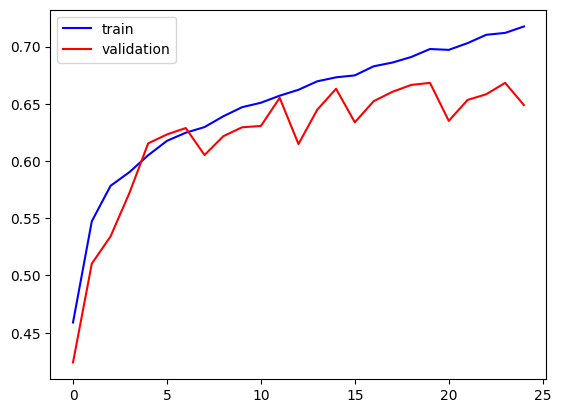

In [15]:
py.plot(history.history['accuracy'],color='blue',label='train')
py.plot(history.history['val_accuracy'],color='red',label='validation')
py.legend()
py.show()

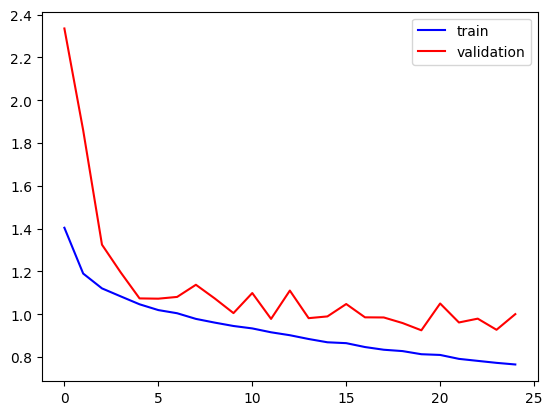

In [16]:
py.plot(history.history['loss'],color='blue',label='train')
py.plot(history.history['val_loss'],color='red',label='validation')
py.legend()
py.show()

In [17]:
new_model.save('Facial_Detection_model.h5')

In [18]:
new_model = keras.models.load_model('Facial_Detection_model.h5')

In [47]:
img_path = 'happpy.png'

In [57]:
img = load_img(img_path,target_size = (224,224))

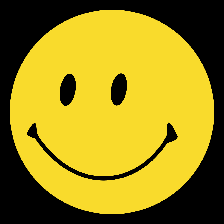

In [58]:
img

In [59]:
x = img_to_array(img)

In [60]:
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [52]:
x = n.expand_dims(x,axis=0)

In [53]:
x

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)